# Face Recognition
This is the final project code of CS308 Computer Vision. Write by group Zhang Zhentao.
This jupyter notebook contains main function of deepface, e.g. match images in database with input image, analyze a face with output of his/her age, gender, race, emotions, etc.

### Dependency Setup and Initializations

In [6]:
%matplotlib inline
from deepface import DeepFace
import matplotlib.pyplot as plt
import os
models = ["VGG-Face", "Facenet", "OpenFace", "ArcFace"]  #available models to be selected
model_name = models[0]
metrics_avail = ["cosine", "euclidean"]  #available metric to be selected when calculating distance between two images
metrics = metrics_avail[0]
lib_path = './VGG-Face2/train' #assigned image library path
test_class = 'Huang Yaqiong' #assign your test class (directory name), e.g. Huang Yaqiong
test_path = f'./VGG-Face2/test/{test_class}/'

Match input image with existing image database.
3 best fits of images are shown with its corresponding distance computed to original image using the assigned **metrics** in initialization.

In [7]:
def find():
    cur_path = os.getcwd()
    print(cur_path)
    fig_name = os.listdir(test_path)[0]
    res = DeepFace.find(img_path=test_path+fig_name, db_path=lib_path, model_name= model_name, distance_metric=metrics, enforce_detection= False)
    #print(res)
    #print(res[0].to_numpy()[0][0], res[0].to_numpy()[0][5])
    #print(res[0].to_numpy()[0])
    #print(len(res[0]))
    
    original_img = plt.imread(test_path+fig_name)
    plt.subplot(2, 2, 1)
    plt.imshow(original_img)
    plt.title('Origin Image')
    ax = plt.gca()
    ax.add_patch(plt.Rectangle((res[0].to_numpy()[0][1], res[0].to_numpy()[0][2]), res[0].to_numpy()[0][3], res[0].to_numpy()[0][4], color = "red", fill= False, linewidth=2))
    plt.axis('off')
    
    for i in range(3):
        if(i >= len(res[0])):
            break
        img = plt.imread(res[0].to_numpy()[i][0])
        detect_res = DeepFace.extract_faces(img_path=res[0].to_numpy()[i][0], enforce_detection=False)
        #print(detect_res[0]["facial_area"])
        face_x = detect_res[0]["facial_area"]["x"]
        face_y = detect_res[0]["facial_area"]["y"]
        face_w = detect_res[0]["facial_area"]["w"]
        face_h = detect_res[0]["facial_area"]["h"]
        plt.subplot(2, 2, i+2)
        plt.imshow(img)
        ax = plt.gca()
        #print(res[0].to_numpy()[i][1], res[0].to_numpy()[i][2], res[0].to_numpy()[i][3], res[0].to_numpy()[i][4], res[0].to_numpy()[i][3], res[0].to_numpy()[i][5])
        ax.add_patch(plt.Rectangle((face_x, face_y), face_w, face_h, color = "red", fill= False, linewidth=2))
        ax.text(face_x/2, face_y/2, f"distance:{round(res[0].to_numpy()[i][5], 2)}", bbox={'facecolor': 'blue', 'alpha': 0.5}, color='red')
        if i == 0:
            plt.title('Best Find Image')
        else:
            plt.title(f'No.{i+1} Fit Image')
        plt.axis('off')
    
    
    
    

Analyze a face with output of his/her age, gender, race, emotions, etc. You can set the parameter of "actions" in *DeepFace.analyze()* method to select which metrics do you want to analyze.

In [8]:
def detect():
    #num = 61
    selected_actions = ['age' , 'emotion', 'race', 'gender']  # change your features if you don't want to detect them all.
    fig_name = os.listdir(test_path)[0]
    res = DeepFace.analyze(img_path= test_path+fig_name, actions= selected_actions, enforce_detection=False)
    print(res)
    img = plt.imread(test_path+fig_name)
    plt.imshow(img)
    region = res[0]["region"]
    x = region["x"]
    y = region["y"]
    w = region["w"]
    h = region["h"]
    ax = plt.gca()
    ax.add_patch(plt.Rectangle((x, y), w, h, color = "red", fill= False, linewidth=2))
    plt.title(f'Age: {res[0]["age"]}, Gender: {res[0]["dominant_gender"]}, \nRace: {res[0]["dominant_race"]}, Emotion: {res[0]["dominant_emotion"]}')
    plt.axis('off')
    
    
    
    

### Test for Functions Above

/mnt/e/Face-Recognition
There are  2148  representations found in  representations_vgg_face.pkl
find function lasts  2.56596040725708  seconds


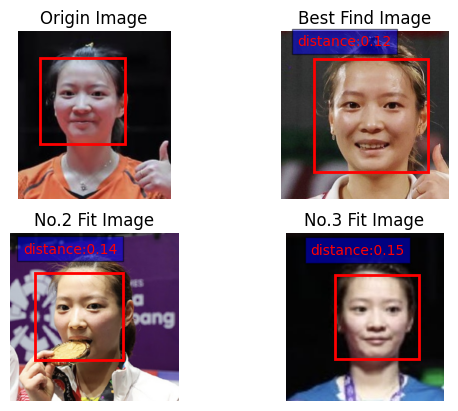

In [9]:

find()

Action: gender: 100%|██████████| 4/4 [00:00<00:00,  5.49it/s] 

[{'age': 34, 'region': {'x': 57, 'y': 69, 'w': 222, 'h': 222}, 'emotion': {'angry': 0.4977797920423622, 'disgust': 0.10193054939019974, 'fear': 0.019548914570948605, 'happy': 96.84663396159613, 'sad': 0.1173018897020453, 'surprise': 0.00348758569867861, 'neutral': 2.4133191951107498}, 'dominant_emotion': 'happy', 'race': {'asian': 99.53255653381348, 'indian': 0.15206398675218225, 'black': 2.5464501618444046e-05, 'white': 0.011081600678153336, 'middle eastern': 5.054678808846802e-06, 'latino hispanic': 0.30426925513893366}, 'dominant_race': 'asian', 'gender': {'Woman': 99.98904466629028, 'Man': 0.010955171455862}, 'dominant_gender': 'Woman'}]


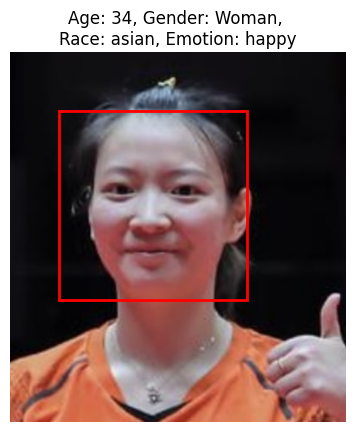

In [10]:
detect()